In [22]:
#for multiple training and testing data combination we use grid cv model ...which uses cross validation(this process)..and then applies pipelining
from sklearn.preprocessing import StandardScaler #used for data normalization step in pre processing 
from sklearn.pipeline import Pipeline #this combines the preprocessing and model training in one step
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV #helps is cross validation for multiple training and testing combinations




In [35]:
x, y = load_diabetes(return_X_y=True)
pipe=Pipeline([
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1))
])
pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])>

In [36]:
mod = GridSearchCV(
    estimator=pipe,
    param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},  # Hyperparameter search for 'n_neighbors'
    cv=3
)

In [37]:
mod.fit(x,y);
#we cant do mod.predict because its incorrect incase of gridcv so what we do is as there are multiple results for multiple values of k 
#we store the results in a dataframe
#result=
pd.DataFrame(mod.cv_results_)
#print(result)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005581,0.004001,0.002493,0.000307,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,9
1,0.001230,0.000087,0.001584,0.000361,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,8
2,0.000000,0.000000,0.000753,0.001065,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,7
3,0.000000,0.000000,0.000000,0.000000,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,5
4,0.000000,0.000000,0.002086,0.002951,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,6
5,0.000000,0.000000,0.000799,0.001129,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,4
6,0.000000,0.000000,0.000000,0.000000,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,3
7,0.004295,0.004507,0.000000,0.000000,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,2
8,0.000000,0.000000,0.000000,0.000000,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,1


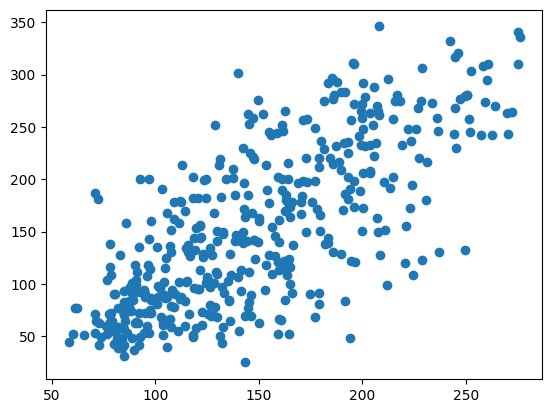

In [39]:
#as we can see that 9 neighbours is ranked 1 suggesting it gives the best results
best_mod=mod.best_estimator_
pred=best_mod.predict(X)
plt.scatter(pred,y)
                                    